In [170]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


### Dataset detials:
This dataset contains over 64,000 responses to 60 questions. Many of the questions are optional. The responses have been anonymized, and there is no personally identifiable information.

In [171]:
stackOverflow_df = pd.read_csv(r"C:\Users\smo2020\Downloads\stack-overflow-developer-survey-2020\survey_results_public.csv")


In [172]:
stackOverflow_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


**Column** - is the response and questionTest is the answer

In [173]:
schema = pd.read_csv(r"C:\Users\smo2020\Downloads\stack-overflow-developer-survey-2020\survey_results_schema.csv")

In [174]:
# Set the 'Column' column as the index
schema.set_index('Column', inplace=True)

# Extract the 'QuestionText' column
schema_row = schema['QuestionText']

In [175]:
schema_row['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

In [176]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [177]:
len(selected_columns)

20

In [178]:
survey_df = stackOverflow_df[selected_columns].copy

In [179]:
schema = schema_row[selected_columns]

In [180]:
survey_df().shape


(64461, 20)

In [181]:
survey_df().info


<bound method DataFrame.info of                   Country   Age Gender  \
0                 Germany   NaN    Man   
1          United Kingdom   NaN    NaN   
2      Russian Federation   NaN    NaN   
3                 Albania  25.0    Man   
4           United States  31.0    Man   
...                   ...   ...    ...   
64456       United States   NaN    NaN   
64457             Morocco   NaN    NaN   
64458            Viet Nam   NaN    NaN   
64459              Poland   NaN    NaN   
64460               Spain   NaN    NaN   

                                               EdLevel  \
0      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
1         Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2                                                  NaN   
3      Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
4         Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
...                                                ...   
64456  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   

In [182]:
# Call the function to get the DataFrame
df = survey_df()

# Now you can apply the pd.to_numeric() function to the DataFrame columns
df['Age1stCode'] = pd.to_numeric(df['Age1stCode'], errors='coerce')
df['YearsCode'] = pd.to_numeric(df['YearsCode'], errors='coerce')
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

In [183]:
df.describe()


,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


In [184]:
df.drop(df[df.Age < 10].index, inplace=True)
df.drop(df[df.Age > 100].index, inplace=True)

In [185]:
df.drop(df[df.WorkWeekHrs > 140].index, inplace=True)


In [186]:
df['Gender'].value_counts()

Gender
Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: count, dtype: int64

In [187]:
import numpy as np

df.where(~(df.Gender.str.contains(';', na=False)), np.nan, inplace=True)


In [188]:
df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
31814,United Kingdom,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Mathematics or statistics,No,22.0,13.0,13.0,SQL,Go;JavaScript;Kotlin;Rust;TypeScript,Every few months,Visit Stack Overflow;Do other work and come ba...,Employed full-time,"Developer, back-end",38.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Occasionally: 1-2 days per quarter but less th...,Somewhat important
46540,Italy,29.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,8.0,10.0,6.0,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,Bash/Shell/PowerShell;Dart;HTML/CSS;JavaScript...,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, full-stack;Developer, game or graph...",35.0,Very satisfied,How widely used or impactful my work output wo...,Occasionally: 1-2 days per quarter but less th...,Somewhat important
56808,Germany,NaN,Man,"Other doctoral degree (Ph.D., Ed.D., etc.)","A natural science (such as biology, chemistry,...",Yes,17.0,10.0,1.0,Bash/Shell/PowerShell;C;C++;Python,Python;Scala,Every few months,Call a coworker or friend;Visit Stack Overflow,Employed full-time,Academic researcher;Data scientist or machine ...,45.0,Very satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Somewhat important
33183,Brazil,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Information systems, information technology, o...",Yes,17.0,8.0,7.0,HTML/CSS;Java;JavaScript;Kotlin;SQL,C++;Java;Kotlin;Ruby;TypeScript,Every few months,Meditate;Call a coworker or friend;Visit Stack...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",40.0,Very satisfied,Remote work options;Opportunities for professi...,Occasionally: 1-2 days per quarter but less th...,Somewhat important
35944,Bosnia and Herzegovina,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,C#;HTML/CSS;JavaScript;PHP;SQL,C#;HTML/CSS;JavaScript;PHP;SQL,Every few months,NaN,"Independent contractor, freelancer, or self-em...",NaN,NaN,NaN,NaN,NaN,NaN
4969,United States,34.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,30.0,4.0,3.0,Bash/Shell/PowerShell;Java;JavaScript;Python;SQL,Bash/Shell/PowerShell;Java;JavaScript;Kotlin;P...,Once a year,Visit Stack Overflow;Watch help / tutorial vid...,Employed full-time,"Academic researcher;Developer, back-end;Develo...",50.0,Very satisfied,"Languages, frameworks, and other technologies ...",Sometimes: 1-2 days per month but less than we...,Fairly important
18939,United States,30.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","A natural science (such as biology, chemistry,...",Yes,12.0,15.0,7.0,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Pyth...,HTML/CSS;JavaScript;Python;Rust,Every few months,Meditate;Call a coworker or friend;Visit Stack...,Employed full-time,"Developer, full-stack",40.0,Slightly satisfied,"Industry that I’d be working in;Languages, fra...",Rarely: 1-2 days per year or less,Somewhat important
13618,Switzerland,36.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","A natural science (such as biology, chemistry,...",Yes,24.0,11.0,11.0,Bash/Shell/PowerShell;C++;Python,C;C++;Go;Python;Rust,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Academic researcher;Developer, back-end;DevOps...",50.0,Very satisfied,Industry that I’d be working in;Financial perf...,Occasionally: 1-2 days per quarter but less th...,Very important
18109,Czech Republic,NaN,Man,I never completed any formal education,NaN,Yes,11.0,3.0,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;HTML/C...,C#;C++;HTML/CSS;JavaScript;Kotlin;Python;Rust,Once a year,Play games;Visit Stack Overflow;Watch help / t...

In [189]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Countries

In [190]:
schema.Country

'Where do you live?'

In [191]:
df.Country.nunique()

183

 * Identify the countries with the highest number of respondents using the value_counts method

In [192]:
top_countries = df.Country.value_counts().head(10)
top_countries

Country
United States     12371
India              8364
United Kingdom     3881
Germany            3864
Canada             2175
France             1884
Brazil             1804
Netherlands        1332
Poland             1259
Australia          1199
Name: count, dtype: int64

### Top 10 countries reported lived

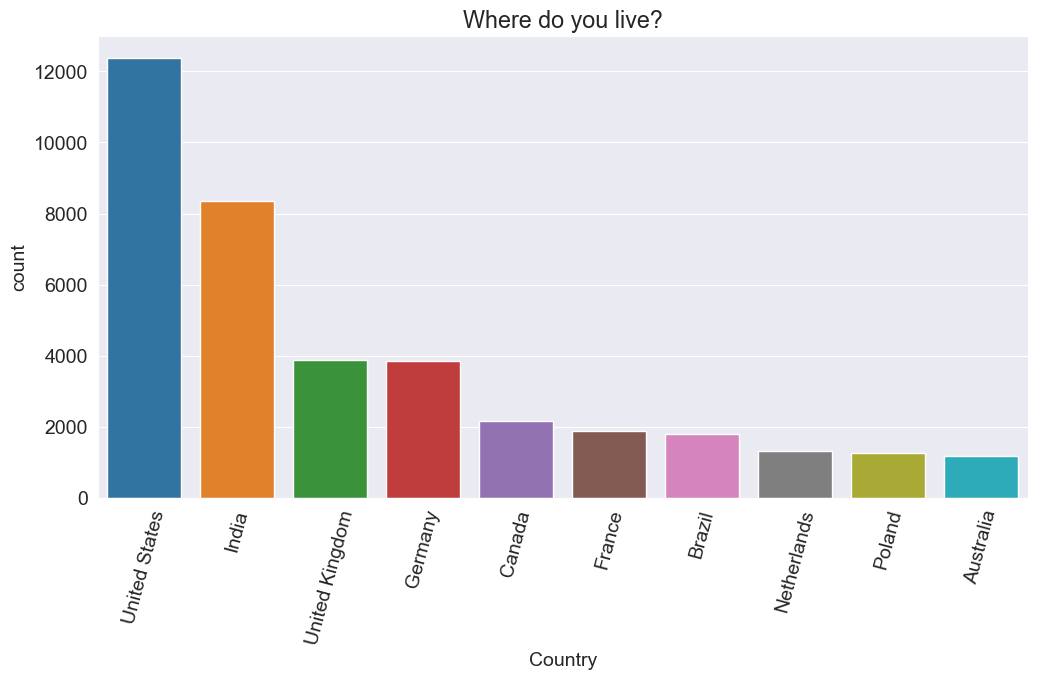

In [193]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(x=top_countries.index, y=top_countries);

* Highlights
It seems that there is a significant overrepresentation of respondents from the United States and India, likely due to the survey being conducted in English, and these countries having the largest English-speaking populations. This suggests that the survey results may not accurately reflect the diversity of the global programming community, particularly from countries where English is not the primary language. Programmers from non-English speaking countries are likely to be underrepresented in the survey data.

### Age

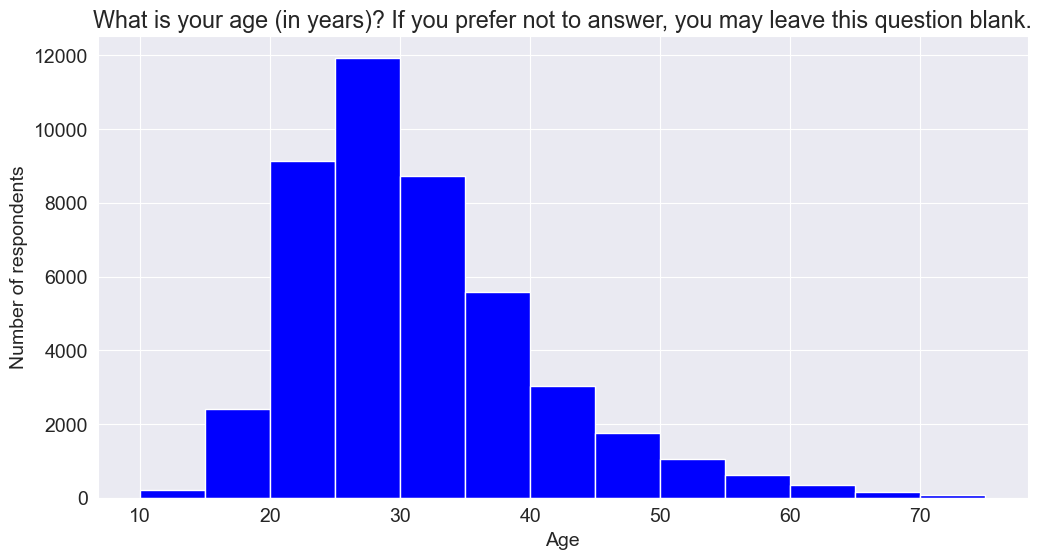

In [194]:
plt.figure(figsize=(12, 6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(df.Age, bins=np.arange(10,80,5), color='blue');


* Highlights

It seems that a significant portion of participants fall within the age range of 20 to 45 years. This demographic trend mirrors the broader programming community, reflecting the influx of young individuals who have embraced computer science either as an academic pursuit or a professional career over the past two decades.

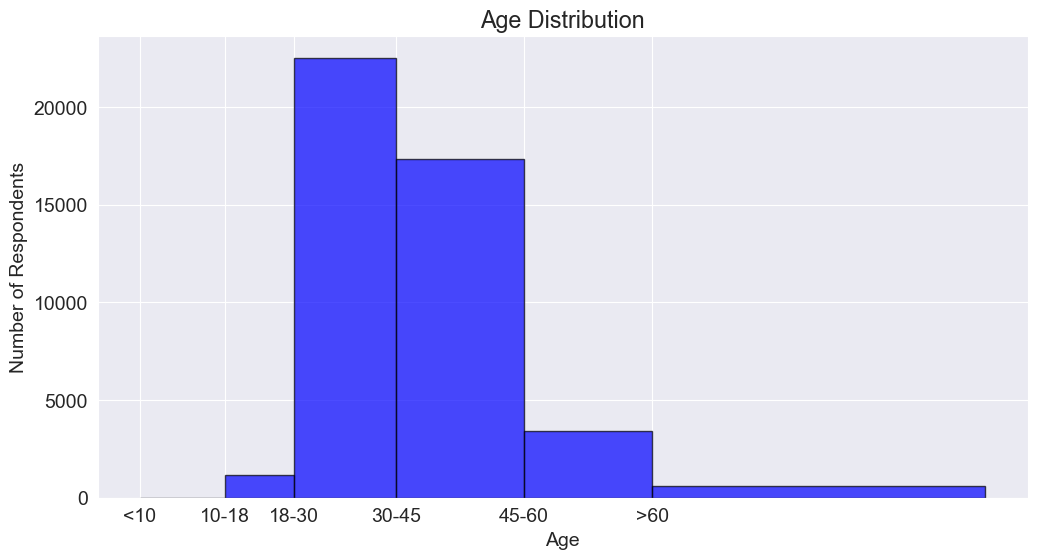

In [195]:
import matplotlib.pyplot as plt
import numpy as np

# Define custom bins and labels
custom_bins = [0, 10, 18, 30, 45, 60, np.max(df.Age)]
custom_labels = ['<10', '10-18', '18-30', '30-45', '45-60', '>60']

# Plotting
plt.figure(figsize=(12, 6))
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Respondents')

plt.hist(df.Age, bins=custom_bins, color='blue', edgecolor='black', alpha=0.7)
plt.xticks(custom_bins[:-1], custom_labels)  # Use custom bins excluding the last one

plt.show()


* Highlights 
The 18-30 age group had the highest number of respondents, with over 20,000 individuals.

### Gender 

In [196]:
# column question
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [197]:
gender_counts = df.Gender.value_counts()

In [198]:
gender_counts

Gender
Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: count, dtype: int64

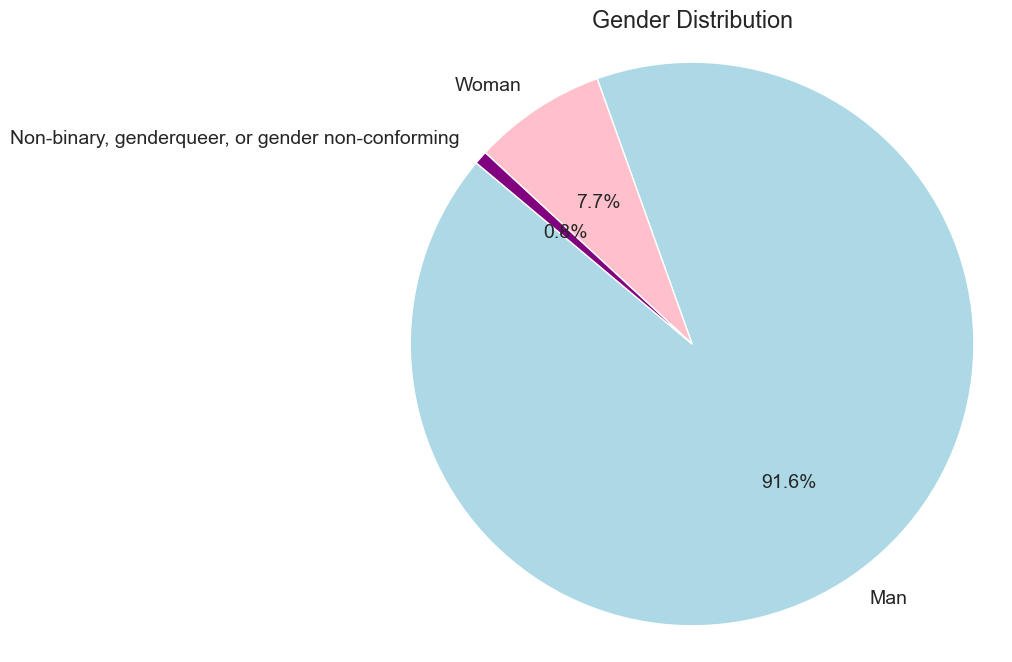

In [199]:
import matplotlib.pyplot as plt

# Assuming gender_counts contains the gender counts
gender_counts = df['Gender'].value_counts()

# Define colors for each gender
colors = ['lightblue', 'pink', 'purple']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


* Highlights
Approximately 8% of survey participants who responded to the question identify as women or non-binary. This percentage is lower than the estimated overall representation of women and non-binary genders in the programming community, which is around 12%.

### Education

Text(0, 0.5, '')

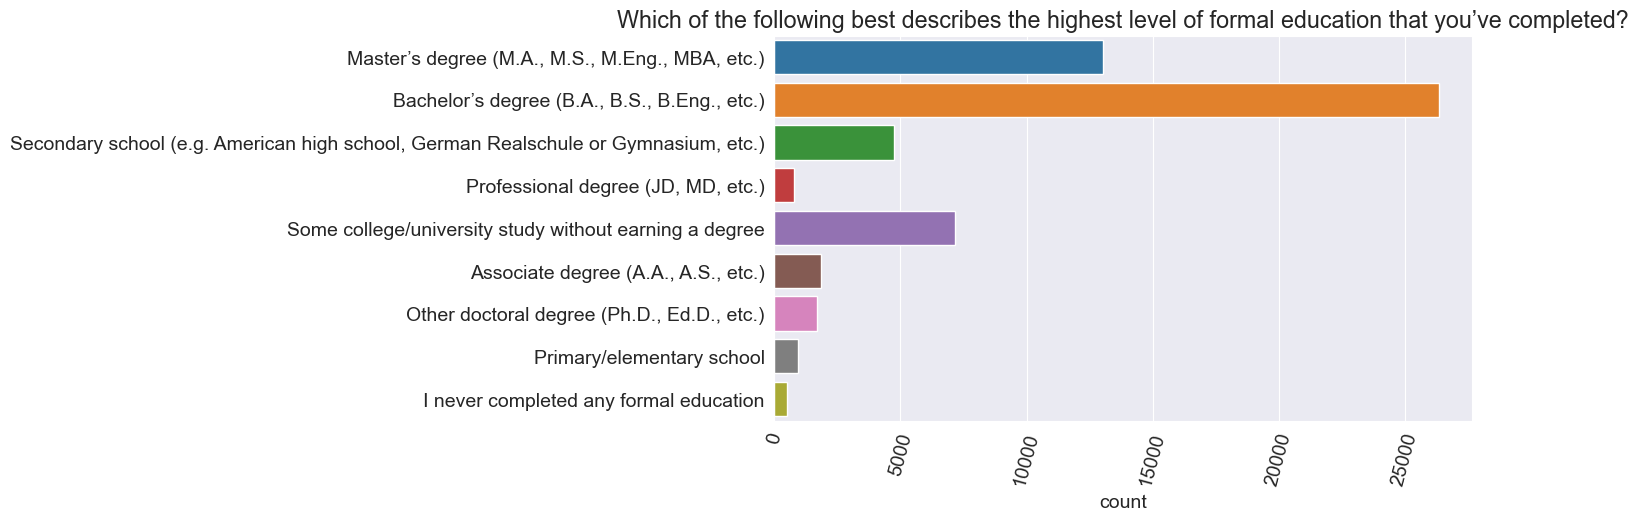

In [200]:
sns.countplot(y=df.EdLevel)
plt.xticks(rotation=75);
plt.title(schema['EdLevel'])
plt.ylabel(None)

* Highlights
Based on the chart, it's evident that well over half of the respondents hold a bachelor's or master's degree, suggesting that most programmers have obtained some level of college education. However, the graph alone does not provide clarity on whether these degrees are specifically in the field of computer science.

In [201]:
schema.UndergradMajor

'What was your primary field of study?'

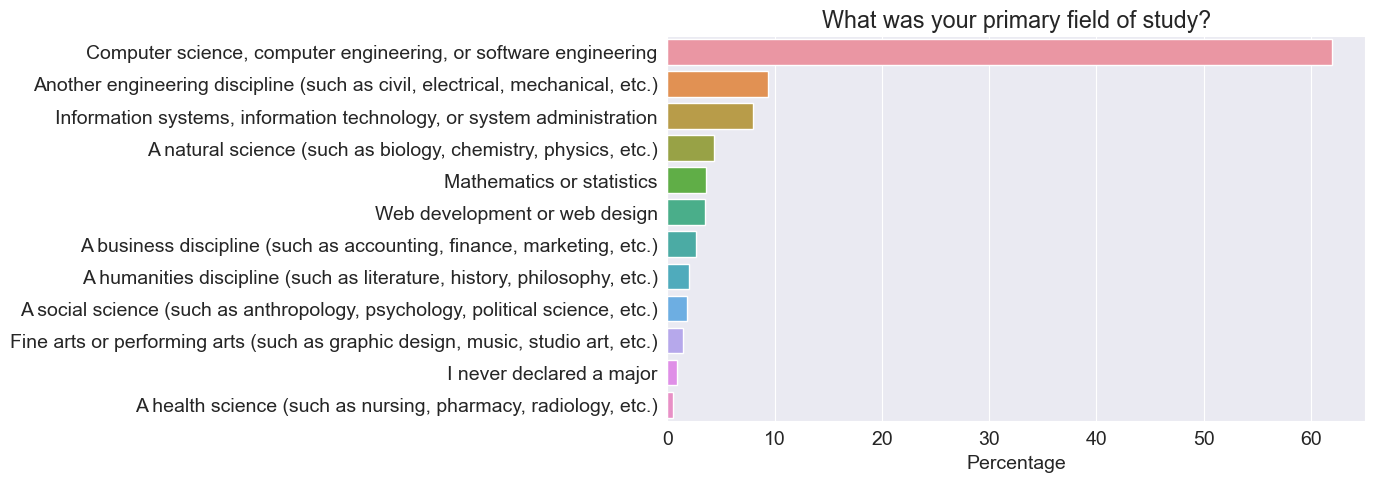

In [202]:
undergrad_pct = df.UndergradMajor.value_counts() * 100 / df.UndergradMajor.count()

sns.barplot(x=undergrad_pct, y=undergrad_pct.index)

plt.title(schema.UndergradMajor)
plt.ylabel(None);
plt.xlabel('Percentage');

* Highlights

The data shows around 60% of programmers field of study was computer sceince or related field. Yet the data also, shows that 40% of programmers with a college degree have studied fields other than computer science. This finding is quite encouraging, as it suggests that while a college education is beneficial, specializing in computer science may not be a prerequisite for success in programming. 

### Employment


In [203]:
# employment column 
schema.Employment

'Which of the following best describes your current employment status?'

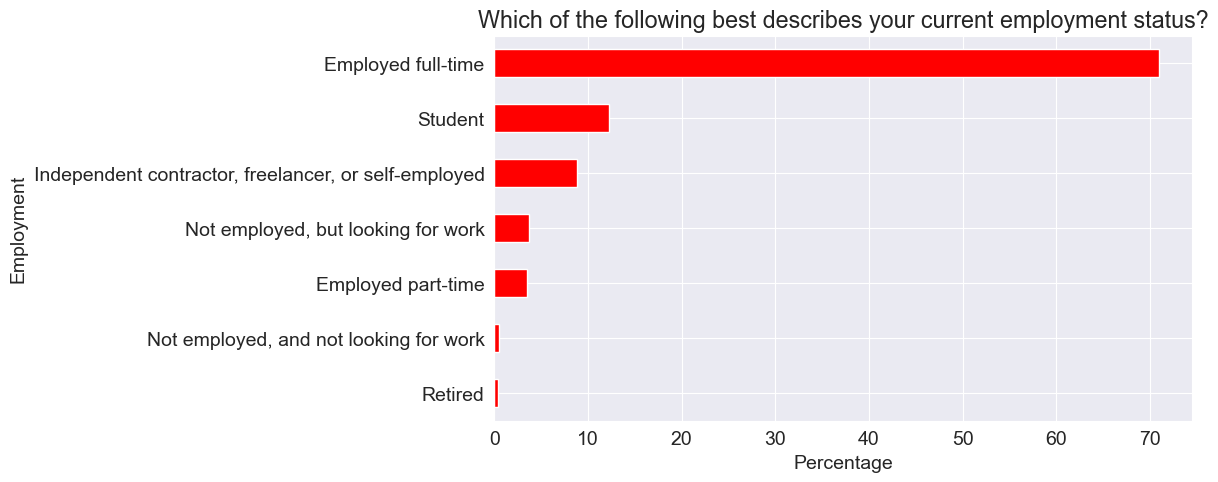

In [204]:
(df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='r')
plt.title(schema.Employment)
plt.xlabel('Percentage');

* Highlights 
Based on the chart around 70 reported holding a full-time role. 

### Dev Type 

In [205]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [206]:
df.DevType.value_counts()

DevType
Developer, full-stack                                                                                                                                                           4396
Developer, back-end                                                                                                                                                             3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                  2214
Developer, back-end;Developer, full-stack                                                                                                                                       1465
Developer, front-end                                                                                                                                                            1390
                                                                                       

In [207]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value in col_series[col_series.notnull()].items():
        # Break each value into a list of options
        for option in value.split(';'):
            # Add the option as a column to the result DataFrame
            result_df.at[idx, option] = 1
            options.append(option)
    return result_df

# Apply the function to the 'DevType' column
dev_type_df = split_multicolumn(df['DevType'])


In [227]:
dev_type_df

,DevType,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,"Developer, desktop or enterprise applications;...",1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Developer, full-stack;Developer, mobile",NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,Senior executive/VP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
64457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [228]:
df.LanguageWorkedWith


0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

In [229]:
languages_worked_df = split_multicolumn(df.LanguageWorkedWith)

In [230]:
languages_worked_df


,LanguageWorkedWith,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,C#;HTML/CSS;JavaScript,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JavaScript;Swift,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Objective-C;Python;Swift,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HTML/CSS;Ruby;SQL,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64457,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
64458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,HTML/CSS,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [234]:
# Summing up occurrences of each language across all respondents
language_counts = languages_worked_df.drop(columns=['LanguageWorkedWith']).sum().sort_values(ascending=False)

# Print the result
print(language_counts)


JavaScript               38515.0
HTML/CSS                 35884.0
SQL                      31153.0
Python                   25080.0
Java                     22905.0
Bash/Shell/PowerShell    18803.0
C#                       17879.0
PHP                      14874.0
TypeScript               14444.0
C++                      13578.0
C                        12370.0
Go                        4989.0
Kotlin                    4429.0
Ruby                      4006.0
Assembly                  3503.0
VBA                       3469.0
Swift                     3361.0
R                         3257.0
Rust                      2893.0
Objective-C               2317.0
Dart                      2262.0
Scala                     2026.0
Perl                      1773.0
Haskell                   1197.0
Julia                      503.0
dtype: float64


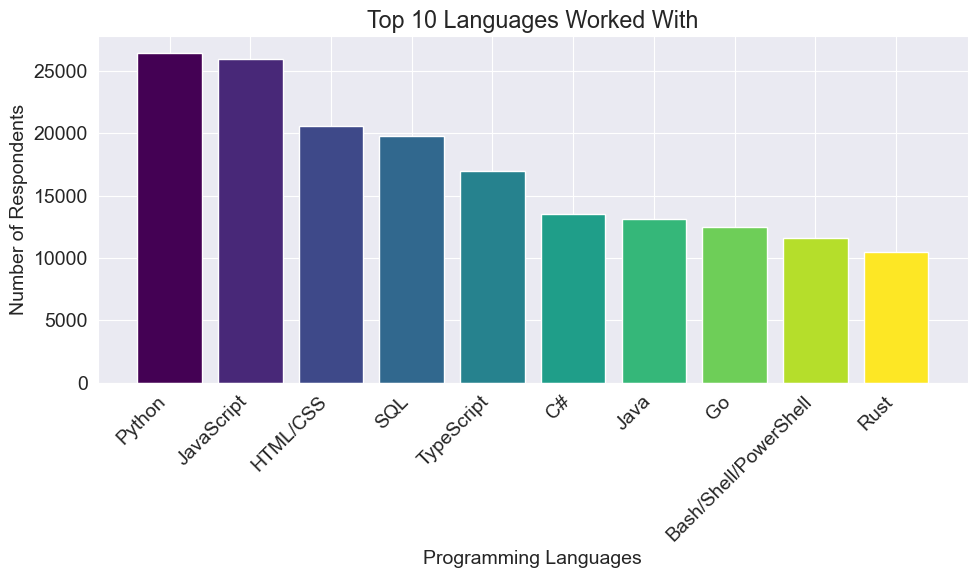

In [262]:

import matplotlib.pyplot as plt
import numpy as np

# Get the top 10 languages worked with
top_languages = language_counts.sort_values(ascending=False).head(10)

# Generate a gradient of colors
colors = plt.cm.viridis(np.linspace(0, 1, len(top_languages)))

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(top_languages.index, top_languages.values, color=colors)

# Add labels and title
plt.title('Top 10 Languages Worked With')
plt.xlabel('Programming Languages')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')

# Show the chart
plt.tight_layout()
plt.show()


**Insights**

Among the 25, JavaScript emerged as the most used programming language. In the realm of data science and data analysis, SQL and Python surpassed R in terms of usage over the past year.

In [258]:
df.LanguageDesireNextYear

0                                   C#;HTML/CSS;JavaScript
1                                             Python;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                          Java;Ruby;Scala
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                             HTML/CSS;Java;JavaScript
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageDesireNextYear, Length: 64306, dtype: object

In [251]:
 LanguageDesireNextYearDf= split_multicolumn(df.LanguageDesireNextYear)

In [252]:
LanguageDesireNextYearDf

,LanguageDesireNextYear,C#,HTML/CSS,JavaScript,Python,Swift,Objective-C,Java,Ruby,Scala,...,Assembly,Bash/Shell/PowerShell,C,Haskell,Perl,C++,Julia,Kotlin,Dart,VBA
0,C#;HTML/CSS;JavaScript,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Python;Swift,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Objective-C;Python;Swift,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Java;Ruby;Scala,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64457,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
64458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,HTML/CSS;Java;JavaScript,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [254]:
# Summing up occurrences of each language across all respondents
language_counts = LanguageDesireNextYearDf.drop(columns=['LanguageDesireNextYear']).sum().sort_values(ascending=False)

# Print the result
print(language_counts)

Python                   26458.0
JavaScript               25996.0
HTML/CSS                 20596.0
SQL                      19806.0
TypeScript               17010.0
C#                       13542.0
Java                     13160.0
Go                       12496.0
Bash/Shell/PowerShell    11612.0
Rust                     10463.0
C++                       9655.0
Kotlin                    9492.0
PHP                       7040.0
C                         6019.0
Swift                     5590.0
Dart                      4700.0
R                         4226.0
Ruby                      4132.0
Scala                     3425.0
Haskell                   2954.0
Assembly                  2422.0
Julia                     1634.0
Objective-C               1504.0
Perl                      1133.0
VBA                       1036.0
dtype: float64


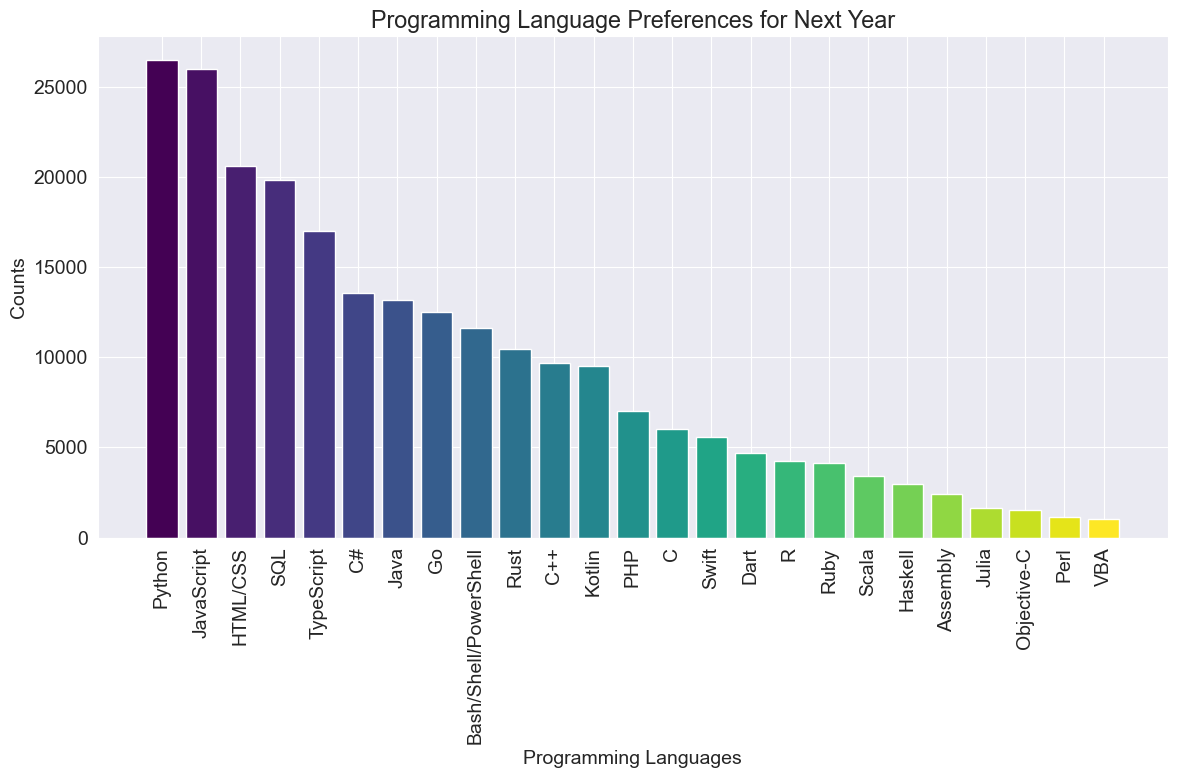

In [261]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming LanguageDesireNextYearDf is your DataFrame containing language counts
# Calculate language counts
language_counts = LanguageDesireNextYearDf.drop(columns=['LanguageDesireNextYear']).sum().sort_values(ascending=False)

# Extract languages and counts
languages = language_counts.index
counts = language_counts.values

# Generate a gradient of colors
colors = plt.cm.viridis(np.linspace(0, 1, len(languages)))

# Create the bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(languages, counts, color=colors)

# Add labels and title
plt.xlabel('Programming Languages')
plt.ylabel('Counts')
plt.title('Programming Language Preferences for Next Year')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the chart
plt.tight_layout()
plt.show()


**Insights**

The 2020 survey places Python at the top of the list of desired languages to learn, while R, previously ranked 18th in languages worked with, moves up to 17th place among the most desired languages to learn.

### Countries where developers work the highest number of hours per week

In [264]:
countries_df =df.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs', ascending=False)


In [266]:
high_response_countries_df = countries_df.loc[df.Country.value_counts() > 250].head(15)

In [267]:
high_response_countries_df

,WorkWeekHrs
Country,
Iran,44.337748
Israel,43.915094
China,42.150000
United States,41.802982
Greece,41.402724
Viet Nam,41.391667
South Africa,41.023460
Turkey,40.982143
Sri Lanka,40.612245


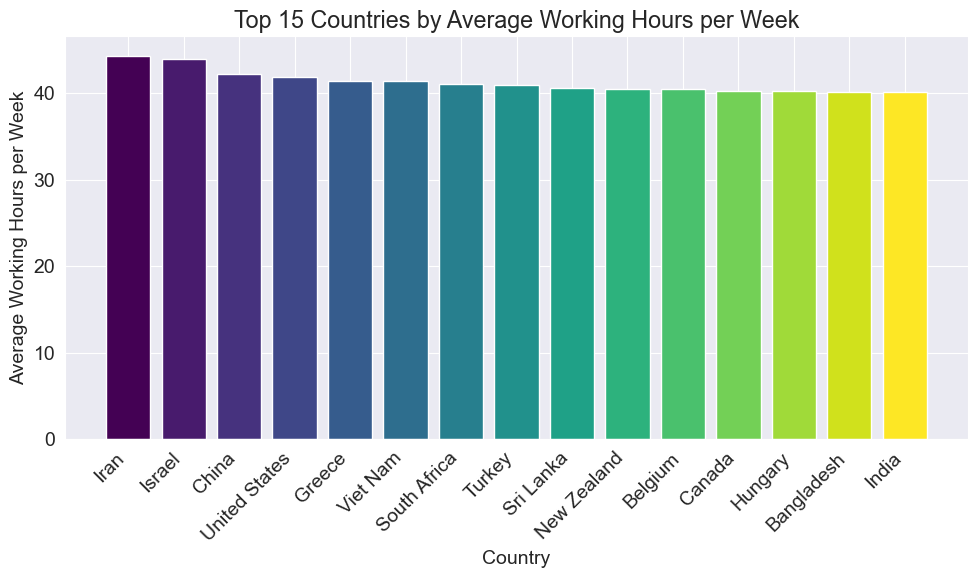

In [268]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming high_response_countries_df is your DataFrame containing country data
# Sort countries by average working hours in descending order and select the top 15
top_countries = high_response_countries_df.sort_values(by='WorkWeekHrs', ascending=False).head(15)

# Generate a gradient of colors
colors = plt.cm.viridis(np.linspace(0, 1, len(top_countries)))

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(top_countries.index, top_countries['WorkWeekHrs'], color=colors)

# Add labels and title
plt.title('Top 15 Countries by Average Working Hours per Week')
plt.xlabel('Country')
plt.ylabel('Average Working Hours per Week')
plt.xticks(rotation=45, ha='right')

# Show the chart
plt.tight_layout()
plt.show()



**Highlights**

Based off the chart, Asian countries like Iran, China, and Israel have the highest working hours, followed by the United States. However, there isn't too much variation overall, and the average working hours seem to be around 41 hours per week.

In [271]:
# Average working hours per week for each country
avg_working_hours = [
    43.915094, 42.150000, 41.802982, 41.402724, 41.391667, 
    41.023460, 40.982143, 40.612245, 40.457551, 40.444444, 
    40.208837, 40.194340, 40.097458, 40.090603
]

# Calculate the average
average_hours = sum(avg_working_hours) / len(avg_working_hours)
print("Average Working Hours per Week:", average_hours)


Average Working Hours per Week: 41.055253428571426


### Age related to programming?

Let's create a scatter plot of Age vs. YearsCodePro

In [272]:
schema.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

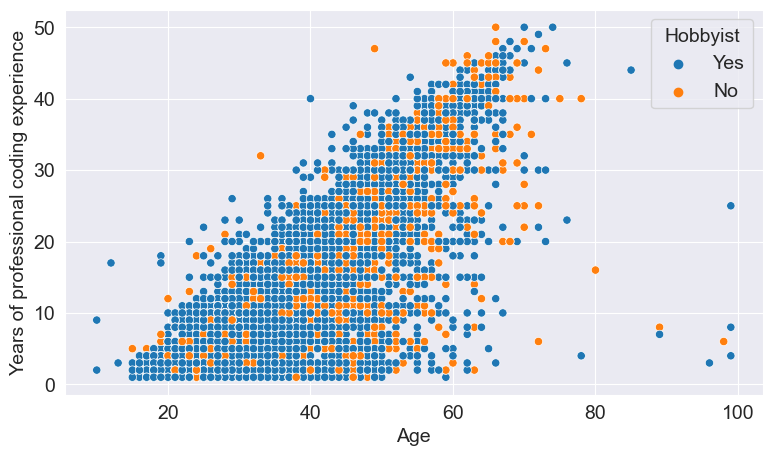

In [273]:
sns.scatterplot(x='Age', y='YearsCodePro', hue='Hobbyist', data=df)
plt.xlabel("Age")
plt.ylabel("Years of professional coding experience");

**Highlights**

Points are scattered across the graph, suggesting that individuals can embark on a professional programming journey at any age. It's evident that numerous individuals who have dedicated decades to coding professionally also find enjoyment in it as a hobby. Moreover, a significant portion of those who affirmed their engagement as hobbyists fall within the age range of 20 to 50.

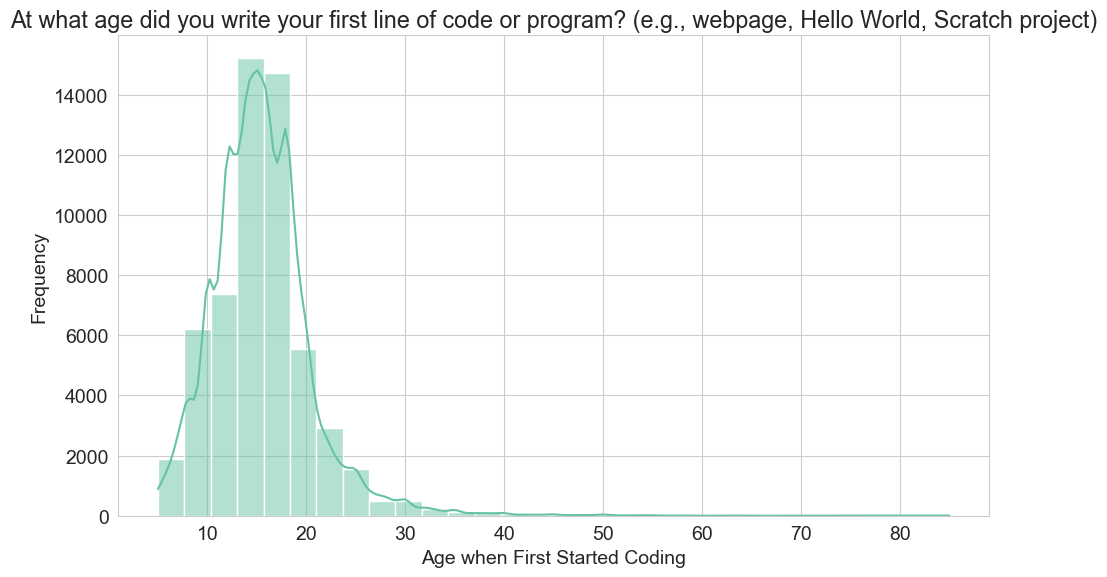

In [276]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and color palette
sns.set_style("whitegrid")
sns.set_palette("Set2")

# Create the histogram with a line plot
plt.figure(figsize=(10, 6))
plt.title(schema.Age1stCode)
sns.histplot(x=df.Age1stCode, bins=30, kde=True)

# Add labels and title
plt.xlabel('Age when First Started Coding')
plt.ylabel('Frequency')
plt.tight_layout()

# Show the plot
plt.show()


**Highlights** 

Most programmers begin practicing lines of code before the age of 40, with many starting in their teens or early twenties.
